# Bogazici University - SP. TP. in Stat. Learning & IE 582
## Homework 2
### Selahattin Seha CIRIT - 2023705006

In this homewowork, different predictive models will be investigating on different dataset from different domains.
- Building a desired classifier learner which should be KNN, Decisision Tree, Random Forest or Boosting
- Tuning those learners specific parameters through cross validation
- Analysing cross validation scores
- And comparing them on same datasets are main tasks that will be included through the homework

Selected datasets have to include the list below
All of them should have
- A separate labeled test data
- Number of training samples and test samples that is larger than 200 (so that the comparison makes sense)
- More than 20 features
- A brief description of the task and features (UCI machine learning repository has nice examples)
    
At least
- One of them should be a regression problem
- Two of them should be multi-class classification problem
- One of them has a class imbalance problem (a ratio of 2:1 will be enough)
- Two of them should have more than 100 features
- One of them has some number of categorical or ordinal features (i.e. not all numerical features)

To be able to align those list, I chose those datasets from UCI Machine Learning Rep. All of selected datasets meet the requirements.

Student Data -> Multi-class clasiffication problem with balanced class target distribution
Energy Data -> Binary classification problem with balanced class target distribution
Superconductivity Data -> Multi-class clasiffication problem with balanced class target distribution
Musk Data -> Binary classification problem with balanced class target distribution
Blog Data -> Binary classification problem with imbalanced class target distribution (2:1 ratio)

while mean cross validation score of each iterations are used on training stage, classification_report function from sklearn are used to evaluate test performance of each classifier.
Classification report function provides detailed classification metrics about test period predictions. It returns precision, recall and f1 and accuracy, macro average and weighted average on total performace. Due to most of the dataset i have balanced distribution, accuracy generally gives enough perspective about test performance. Weighted average are used to evaluate as performance metric in imbalanced class distribution which is blog data

! In some GBT model steps, random search fine-tuning method was used to avoid time complexity. Due to some bug in parallellization of grid search (n_jobs), unfortunately i use only one thread to train model in cross validation. So model run time getting worser in GBT model step

In [ ]:
import pandas as pd

# Student Performance in Portuguese Lecture dataset
# To reach detailed information about the dataset, https://archive.ics.uci.edu/dataset/320/student+performance
# Target transformation was applied to transform the problem into multi-class classification with balanced class distribution
# Predicting the final grade of a student is main mission

student_data = pd.read_csv("./Dataset/student-por.csv", sep=";")
print("Data Shape", student_data.shape)

student_data["target"] = student_data[["G1", "G2", "G3"]].mean(axis=1)
student_data["target"] = pd.qcut(student_data["target"], q=3, labels=["Bad Grade", "Average Grade", "Great Grade"])
student_data.drop(columns=["G1", "G2", "G3"], inplace=True)

# throughout the homework, student-final.csv file will be used.
student_data.to_csv("./Dataset/student-final.csv", index=False)

# Appliances energy prediction dataset
# To reach detailed information about the dataset, https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction
# Target transformation was applied to transform the problem into binary classification problem with balanced class distribution
# Predicting energy appliances whether it is under or over threshold. Threshold is selected as median of energy appliances

energy_data = pd.read_csv("./Dataset/energydata_complete.csv")
print("Data Shape", energy_data.shape)

energy_data["target"] = pd.qcut(energy_data["Appliances"], q=2, labels=["Under the threshold", "Over the threshold"])
energy_data.drop(columns=["Appliances"], inplace=True)

# throughout the homework, energydata-final.csv file will be used.
energy_data.to_csv("./Dataset/energydata-final.csv", index=False)

# Superconductivity prediction dataset
# To reach detailed information about the dataset, https://archive.ics.uci.edu/dataset/464/superconductivty+data
# Target transformation was applied to transform the problem into multiclass classification problem with balanced class distribution
# Predicting critical temperature to superconductivity in three different critical temperature classes which are low, mid and high.

superconductivity_data = pd.read_csv("./Dataset/train.csv")
print("Data Shape", superconductivity_data.shape)
superconductivity_data["target"] = pd.qcut(superconductivity_data["critical_temp"], q=3, labels=["Low Critical Temp", "Mid Critical Temp", "High Critical Temp"])
superconductivity_data.drop(columns=["critical_temp", "number_of_elements"], inplace=True)

# throughout the homework, superconductivity-final.csv file will be used.
superconductivity_data.to_csv("./Dataset/superconductivity-final.csv", index=False)

# Musk prediction dataset
# To reach detailed information about the dataset, https://archive.ics.uci.edu/dataset/74/musk+version+1, imbalanced target distribution

musk_cols = ["molecule_name", "conformation_name"] + [f"f{x}" for x in range(166)] + ["target"]
musk_data = pd.read_csv("./Dataset/clean1.data", header=None)
musk_data.columns = musk_cols

# throughout the homework, muskdata-final.csv file will be used.
musk_data.to_csv("./Dataset/muskdata-final.csv", index=False)

# I transformed the problem into whether the post received any comment or not from predicting how many comments the blog post received.
# To reach detailed information about the dataset, https://archive.ics.uci.edu/dataset/304/blogfeedback, imbalanced target distribution

blog_data = pd.read_csv("./Dataset/blogData_train.csv", header=None)

# assigning column names
blog_data.columns = [f"f{x}" for x in range(280)] + ["received_comments"]
blog_data["received_comments"] = blog_data["received_comments"].clip(lower=0).astype("int")

# creating imbalanced class names with nearly 2:1 ratio
blog_data["target"] = blog_data.received_comments.values
blog_data.loc[blog_data.received_comments == 0, "target"] = "Not include any comment"
blog_data.loc[blog_data.received_comments > 0, "target"] = "Include comment"

blog_data.drop(columns=["received_comments"], inplace=True)
# throughout the homework, blogdata-final.csv file will be used.
blog_data.to_csv("./Dataset/blogdata-final.csv", index=False)

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Dataset

blog_data = pd.read_csv("./Dataset/blogdata-final.csv")
print(blog_data.shape)
energy_data = pd.read_csv("./Dataset/energydata-final.csv")
energy_data.drop(columns=["date"], inplace=True) # to eliminate the data from its time-series nature
print(energy_data.shape)
musk_data = pd.read_csv("./Dataset/muskdata-final.csv")
musk_data.loc[musk_data.target == 1, "target"] = "musk"
musk_data.loc[musk_data.target == 0, "target"] = "no-musk"

print(musk_data.shape)
student_data = pd.read_csv("./Dataset/student-final.csv")
print(student_data.shape)
superconductivity_data = pd.read_csv("./Dataset/superconductivity-final.csv")
print(superconductivity_data.shape)

(52397, 281)
(19735, 28)
(476, 169)
(649, 31)
(21263, 81)


In [195]:
from sklearn.model_selection import train_test_split

def train_test_split_pieces(data):
    """Split data into train and test, also mapping binary target from strings to discrete numbers"""
    X = data.drop(columns="target")
    y = data["target"]

    if y.nunique() == 3:
        label1, label2, label3 = tuple(y.unique())
        y = y.map({label1: 0, label2: 1, label3: 2})
    elif y.nunique() == 2:
        label1, label2 = tuple(y.unique())
        y = y.map({label1: 0, label2: 1})
    else:
        print("error")
        raise KeyError

    # to prevent balanced class distribution in train and test, stratify parameter control the balance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=6969, shuffle=True, stratify=y)

    return X_train, X_test, y_train, y_test

In [208]:
import numpy as np

from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

def end2end_model_pipeline(data, estimator_type, estimator_name, param_grid, tuning_type = "GridSearch", cv_fold = 5, scaling_status = False):
    """
    end-to-end generic model pipeline
    """
    X_train, X_test, y_train, y_test = train_test_split_pieces(data)
    X = pd.concat([X_train, X_test], ignore_index=True)
    
    numerical_cols_selector, categorical_cols_selector = make_column_selector(dtype_exclude=object), make_column_selector(dtype_include=object)
    numerical_columns, categorical_columns = numerical_cols_selector(X), categorical_cols_selector(X)

    if scaling_status:
        numerical_preprocessor = Pipeline([
            ("scaler", StandardScaler())
            ])
        
    categorical_preprocessor = Pipeline([
        ("onehot-encoder", OneHotEncoder(handle_unknown="ignore"))
        ])

    if scaling_status:
        preprocessor = ColumnTransformer([
            ("numerical", numerical_preprocessor, numerical_columns),
            ("categorical", categorical_preprocessor, categorical_columns)
        ])
    else:
        preprocessor = ColumnTransformer([
            ("categorical", categorical_preprocessor, categorical_columns)
        ])

    model_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", estimator_type)
    ])
    if tuning_type == "GridSearch":
        model = GridSearchCV(model_pipeline, param_grid, n_jobs=1, return_train_score=True, refit=True, cv=cv_fold)
    else:
        model = RandomizedSearchCV(model_pipeline, param_grid, n_iter=15, n_jobs=1, return_train_score=True, refit=True, cv=cv_fold)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    tune_search_results = pd.DataFrame(model.cv_results_)
    tune_parameters = list(tune_search_results.filter(like="param_"))
    cv_plot_cols = tune_parameters + ["mean_train_score", "mean_test_score"]

    cv_scores = tune_search_results[cv_plot_cols].copy()
    cv_scores["Iteration"] = [x for x in range(len(cv_scores))]

    best_param_df = pd.DataFrame(model.best_params_, index=[0])
    best_param_df.columns = [f"param_{x}" for x in list(best_param_df)]
    best_param_in_iteration = cv_scores.merge(best_param_df).loc[:,"Iteration"].to_list()[0]

    ax = cv_scores[["mean_test_score", "mean_train_score", "Iteration"]].plot(figsize=(15, 5), x="Iteration")
    ax.axvline(best_param_in_iteration, label="Selected Best Param", ls="--", color="black")
    ax.set_title(f"{estimator_name} Average Tuning Result on Training and Validation Folds - {model.best_params_}")
    ax.legend()
        
    print("Test Results\n",classification_report(y_test, pred, target_names=data.target.unique(), zero_division="warn"))

#### Student Data Analysis based on different predictive models

In [197]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

knn_model_meta = {
    "estimator": KNeighborsClassifier(),
    "estimator_name": "KNN",
    "param_grid": {
        "model__n_neighbors": np.arange(1, 6),
        "model__p": [1, 2] # euclidean distance or manhattan distance
    }
}

dt_model_meta = {
    "estimator": DecisionTreeClassifier(random_state=6969),
    "estimator_name": "DT",
    "param_grid": {
        "model__min_samples_leaf": [20, 25, 30, 35, 40],
        "model__min_samples_split": [40, 50, 60, 70, 80]
    }
}

rf_model_meta = {
    "estimator": RandomForestClassifier(random_state=6969, n_estimators=500, min_samples_leaf=5, ccp_alpha=0),
    "estimator_name": "RF",
    "param_grid": {
        "model__max_features": ["sqrt", "log2", 3, 4, 5, 6, 7]
    }
}

gbt_model_meta = {
    "estimator": GradientBoostingClassifier(random_state=6969),
    "estimator_name": "GBT",
    "param_grid": {
        "model__learning_rate": [0.001, 0.0025, 0.005, 0.075, 0.01],
        "model__max_depth": [4, 5, 6, 7, 8],
        "model__n_estimators": [400, 450, 500, 550, 600]
    }
}

main_meta = {
    "knn_meta": knn_model_meta,
    "dt_meta": dt_model_meta,
    "rf_meta": rf_model_meta,
    "gbt_meta": gbt_model_meta,
}

knn_meta
Test Results
                precision    recall  f1-score   support

    Bad Grade       0.61      0.54      0.58       114
Average Grade       0.37      0.45      0.41       104
  Great Grade       0.45      0.41      0.43       107

     accuracy                           0.47       325
    macro avg       0.48      0.47      0.47       325
 weighted avg       0.48      0.47      0.47       325

dt_meta
Test Results
                precision    recall  f1-score   support

    Bad Grade       0.55      0.68      0.61       114
Average Grade       0.36      0.19      0.25       104
  Great Grade       0.44      0.53      0.48       107

     accuracy                           0.48       325
    macro avg       0.45      0.47      0.45       325
 weighted avg       0.46      0.48      0.45       325

rf_meta
Test Results
                precision    recall  f1-score   support

    Bad Grade       0.61      0.73      0.66       114
Average Grade       0.44      0.31      0.36  

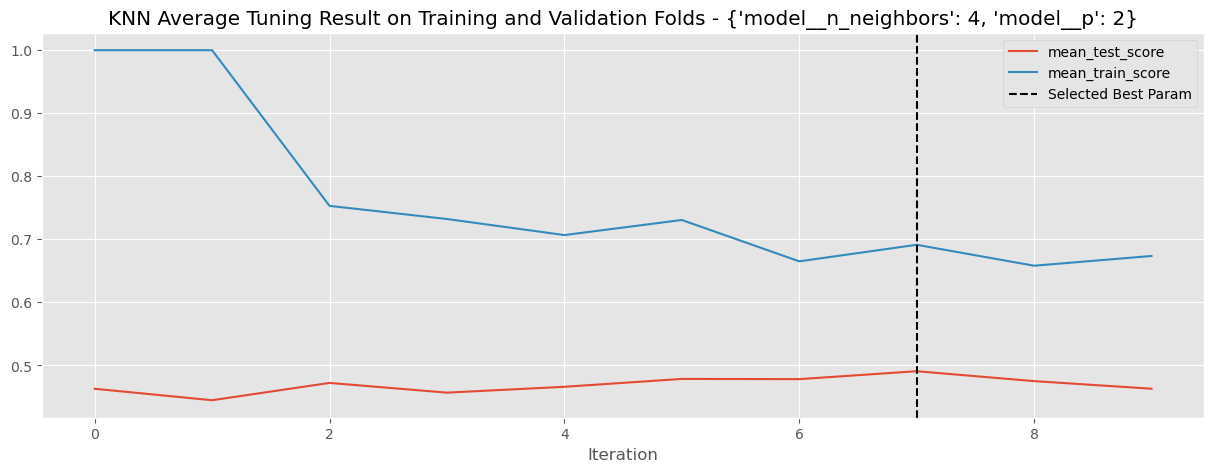

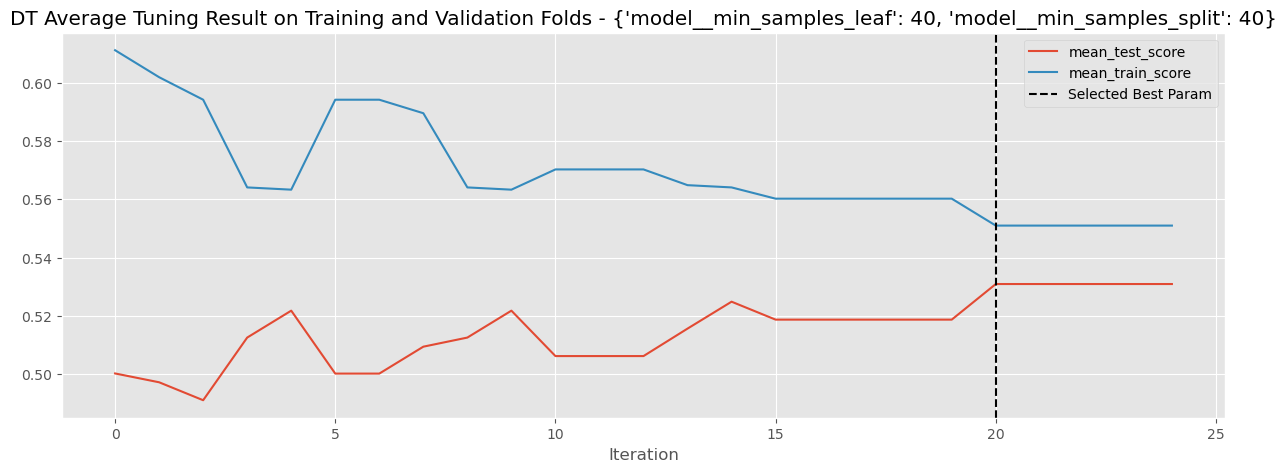

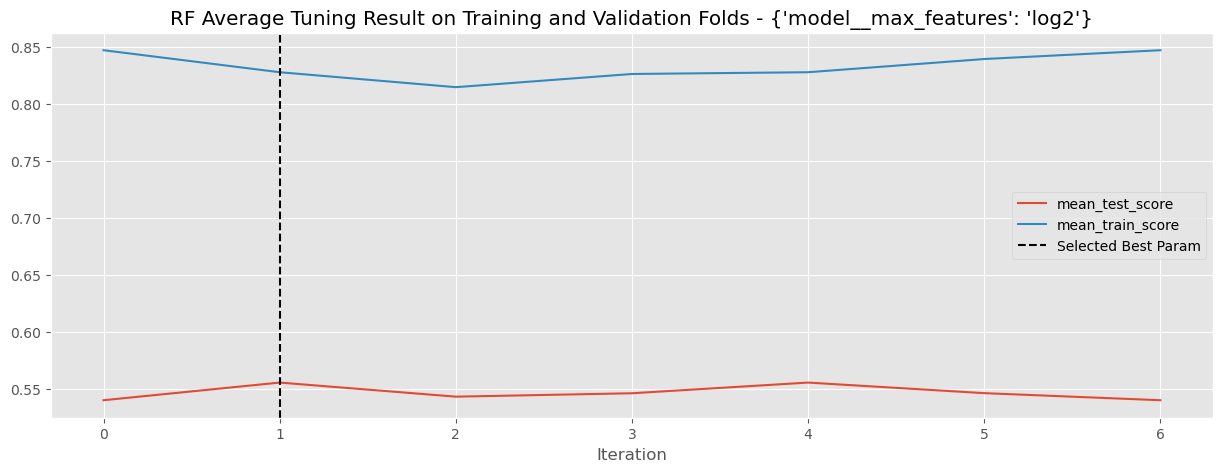

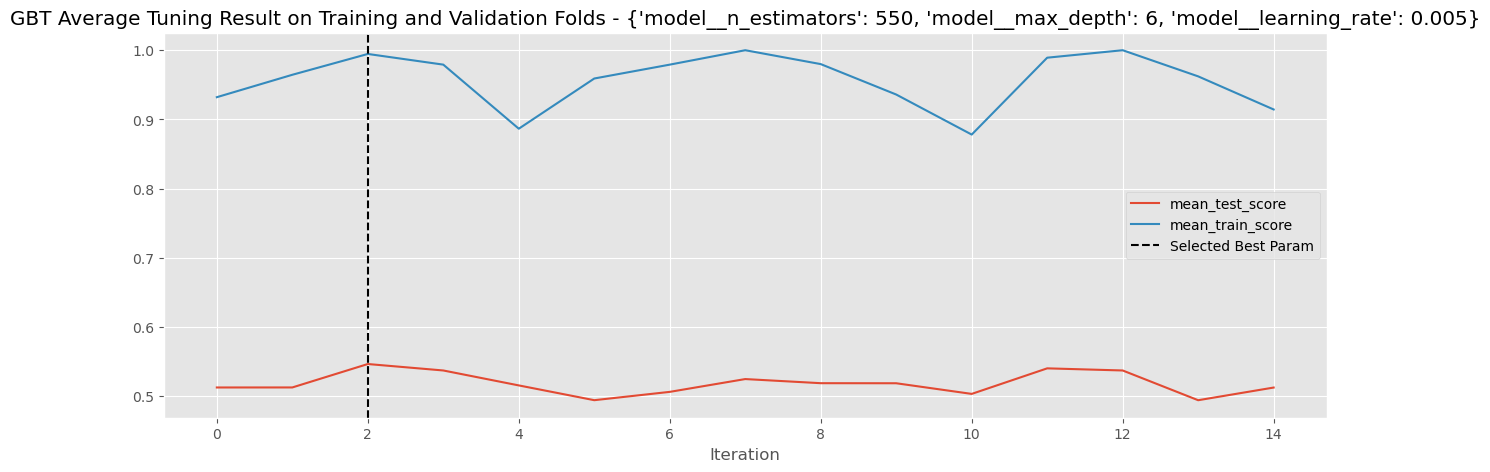

In [209]:
for model in main_meta.keys():
    print(model)
    temp_meta_dict = main_meta[model]
    estimator = temp_meta_dict["estimator"]
    est_name = temp_meta_dict["estimator_name"]
    param_grid = temp_meta_dict["param_grid"]

    if model == "gbt_meta":
        tuning = "RandomSearch"

    end2end_model_pipeline(
        student_data, estimator, est_name,  param_grid, tuning_type=tuning, scaling_status=True
        )

Findings about Student Data:
- Random Forest Classifier seems to the best than others on test period.
- Cross validation, validation period mean scores (mean_test_score) is also consistent with test performance.
- KNN and Decision Tree classifier have slightly worser than GBT and RF classifiers.
- Boosting model can be overfit to noise in data by using mean_train_score from cross validation.
- Performance may be better by using different model parameters.

#### Musk Data Analysis based on different predictive models

In [148]:
knn_model_meta = {
    "estimator": KNeighborsClassifier(),
    "estimator_name": "KNN",
    "param_grid": {
        "model__n_neighbors": np.arange(1, 6),
        "model__p": np.arange(1, 3)
    }
}

dt_model_meta = {
    "estimator": DecisionTreeClassifier(random_state=6969),
    "estimator_name": "DT",
    "param_grid": {
        "model__min_samples_leaf": [5, 10, 15, 20, 25],
        "model__min_samples_split": [10, 20, 30, 40, 50]
    }
}

rf_model_meta = {
    "estimator": RandomForestClassifier(random_state=6969, n_estimators=500, min_samples_leaf=5, ccp_alpha=0),
    "estimator_name": "RF",
    "param_grid": {
        "model__max_features": ["sqrt", "log2", 8, 9, 10, 11, 12]
    }
}

gbt_model_meta = {
    "estimator": GradientBoostingClassifier(random_state=6969),
    "estimator_name": "GBT",
    "param_grid": {
        "model__learning_rate": [0.001, 0.0025, 0.005, 0.075, 0.01],
        "model__max_depth": [4, 5, 6, 7, 8],
        "model__n_estimators": [400, 450, 500, 550, 600]
    }
}

main_meta = {
    "knn_meta": knn_model_meta,
    "dt_meta": dt_model_meta,
    "rf_meta": rf_model_meta,
    "gbt_meta": gbt_model_meta,
}

knn_meta
Test Results
               precision    recall  f1-score   support

        musk       0.74      0.93      0.82       103
     no-musk       0.94      0.75      0.83       135

    accuracy                           0.83       238
   macro avg       0.84      0.84      0.83       238
weighted avg       0.85      0.83      0.83       238

dt_meta
Test Results
               precision    recall  f1-score   support

        musk       0.62      1.00      0.76       103
     no-musk       1.00      0.53      0.69       135

    accuracy                           0.73       238
   macro avg       0.81      0.76      0.73       238
weighted avg       0.83      0.73      0.72       238

rf_meta


/home/ssc/miniconda3/envs/foreflux/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ssc/miniconda3/envs/foreflux/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ssc/miniconda3/envs/foreflux/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

Test Results
               precision    recall  f1-score   support

        musk       0.00      0.00      0.00       103
     no-musk       0.57      1.00      0.72       135

    accuracy                           0.57       238
   macro avg       0.28      0.50      0.36       238
weighted avg       0.32      0.57      0.41       238

gbt_meta
Test Results
               precision    recall  f1-score   support

        musk       0.80      1.00      0.89       103
     no-musk       1.00      0.81      0.89       135

    accuracy                           0.89       238
   macro avg       0.90      0.90      0.89       238
weighted avg       0.91      0.89      0.89       238



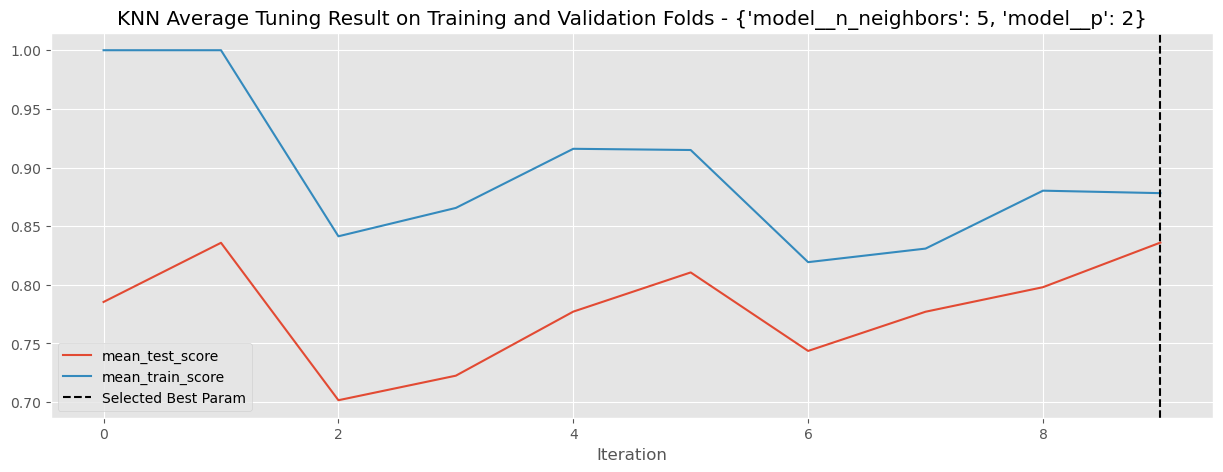

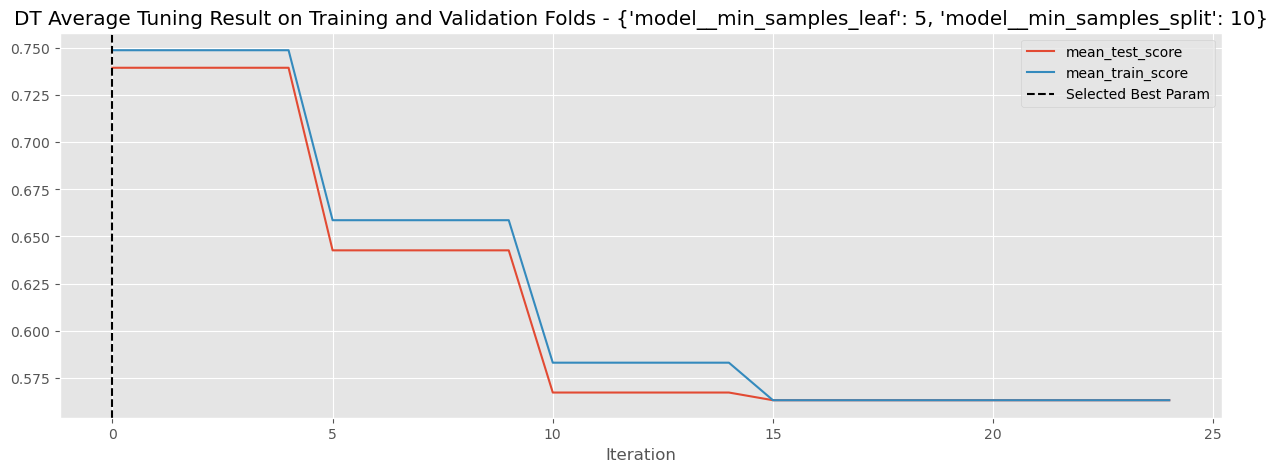

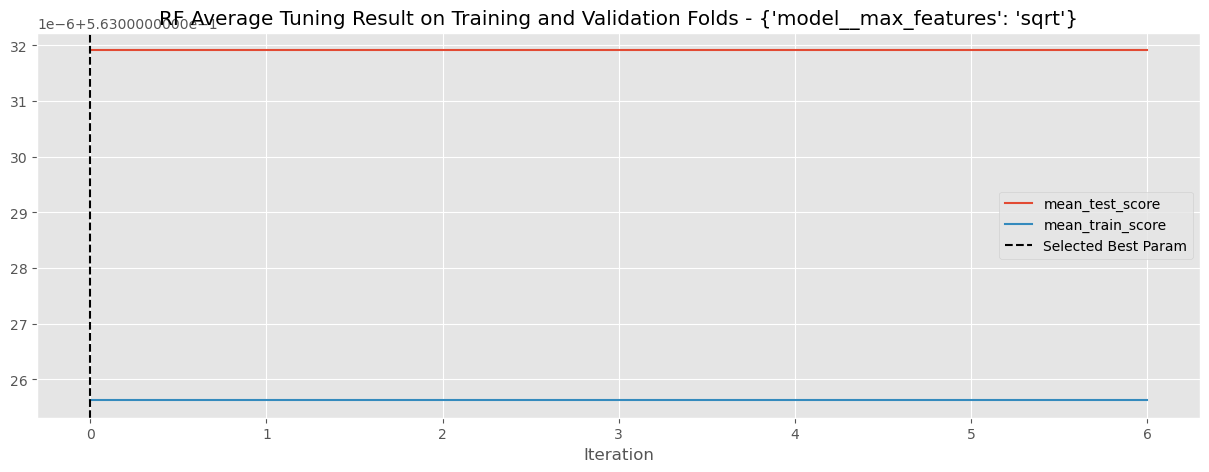

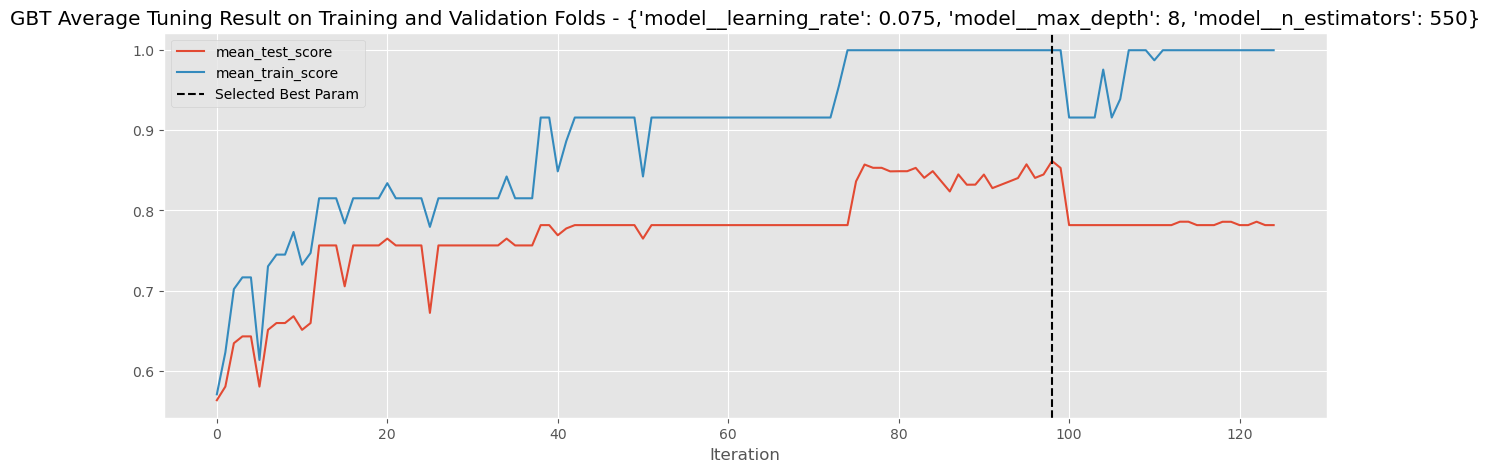

In [162]:
for model in main_meta.keys():
    print(model)
    temp_meta_dict = main_meta[model]
    estimator = temp_meta_dict["estimator"]
    est_name = temp_meta_dict["estimator_name"]
    param_grid = temp_meta_dict["param_grid"]
        
    end2end_model_pipeline(
        musk_data, estimator, est_name,  param_grid, scaling_status=True
        )

Findings about Musk Data:
- GBT and KNN seems to the best than others on test period.
- Cross validation, validation period mean scores (mean_test_score) is also consistent with test performance.
- RF and Decision Tree classifier have slightly worser than GBT and KNN classifiers.
- Performance may be better by using different model parameters.

#### Energy Data Analysis based on different predictive models

In [163]:
knn_model_meta = {
    "estimator": KNeighborsClassifier(),
    "estimator_name": "KNN",
    "param_grid": {
        "model__n_neighbors": np.arange(1, 6),
        "model__p": np.arange(1, 3)
    }
}

dt_model_meta = {
    "estimator": DecisionTreeClassifier(random_state=6969),
    "estimator_name": "DT",
    "param_grid": {
        "model__min_samples_leaf": [5, 10, 15, 20, 25],
        "model__min_samples_split": [10, 20, 30, 40, 50]
    }
}

rf_model_meta = {
    "estimator": RandomForestClassifier(random_state=6969, n_estimators=500, min_samples_leaf=5, ccp_alpha=0),
    "estimator_name": "RF",
    "param_grid": {
        "model__max_features": ["sqrt", "log2", 8, 9, 10, 11, 12]
    }
}

gbt_model_meta = {
    "estimator": GradientBoostingClassifier(random_state=6969),
    "estimator_name": "GBT",
    "param_grid": {
        "model__learning_rate": [0.001, 0.0025, 0.005, 0.075, 0.01],
        "model__max_depth": [4, 5, 6, 7, 8],
        "model__n_estimators": [400, 450, 500, 550, 600]
    }
}

main_meta = {
    "knn_meta": knn_model_meta,
    "dt_meta": dt_model_meta,
    "rf_meta": rf_model_meta,
    "gbt_meta": gbt_model_meta,
}

knn_meta
Test Results
                      precision    recall  f1-score   support

Under the threshold       0.86      0.90      0.88      5372
 Over the threshold       0.87      0.83      0.85      4496

           accuracy                           0.87      9868
          macro avg       0.87      0.87      0.87      9868
       weighted avg       0.87      0.87      0.87      9868

dt_meta
Test Results
                      precision    recall  f1-score   support

Under the threshold       0.83      0.86      0.84      5372
 Over the threshold       0.82      0.79      0.81      4496

           accuracy                           0.83      9868
          macro avg       0.83      0.82      0.82      9868
       weighted avg       0.83      0.83      0.83      9868

rf_meta
Test Results
                      precision    recall  f1-score   support

Under the threshold       0.88      0.90      0.89      5372
 Over the threshold       0.87      0.86      0.86      4496

          

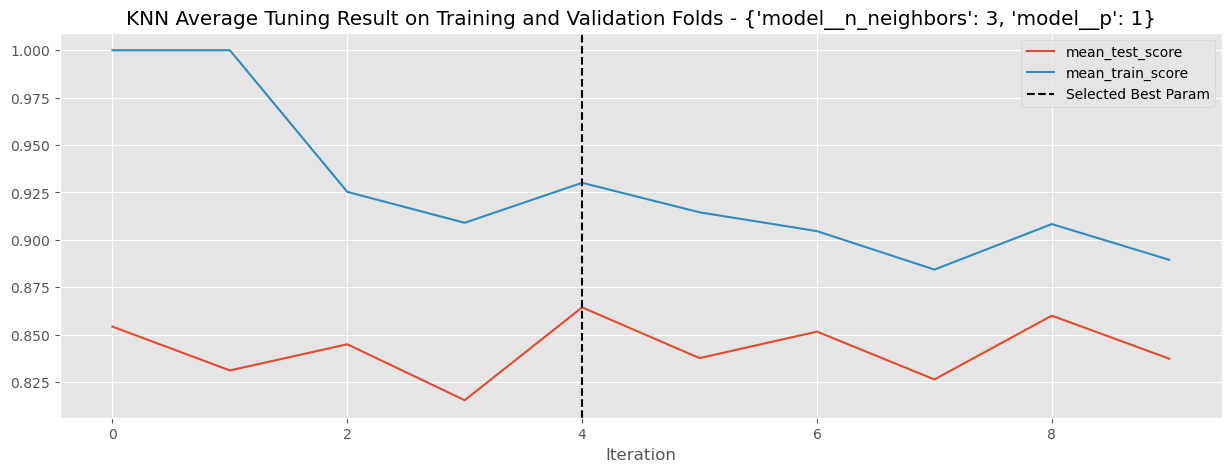

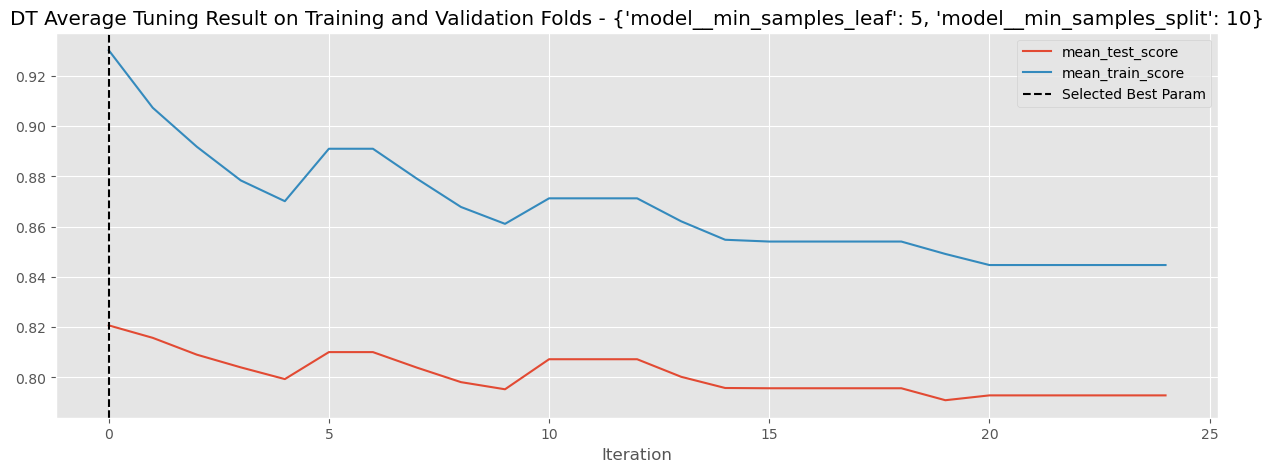

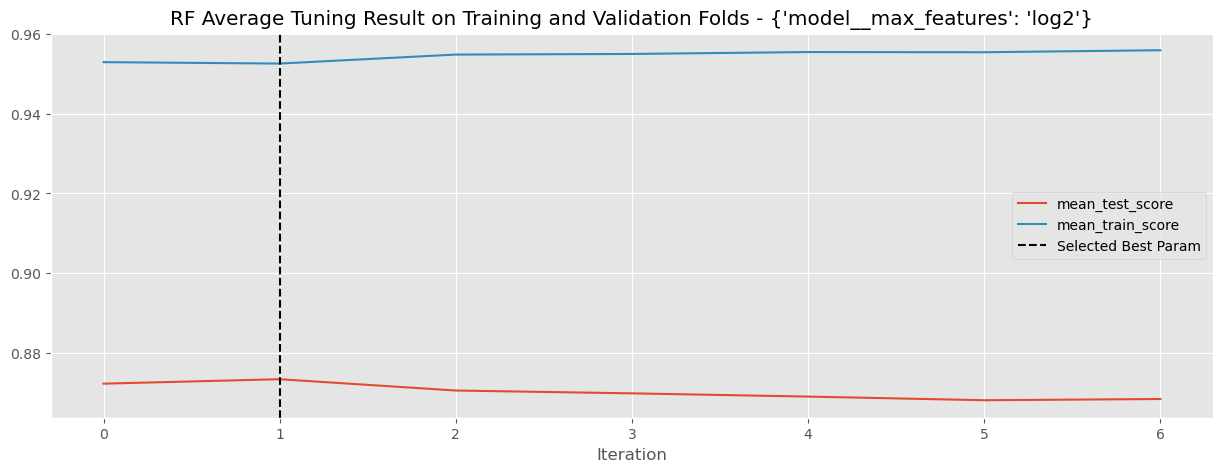

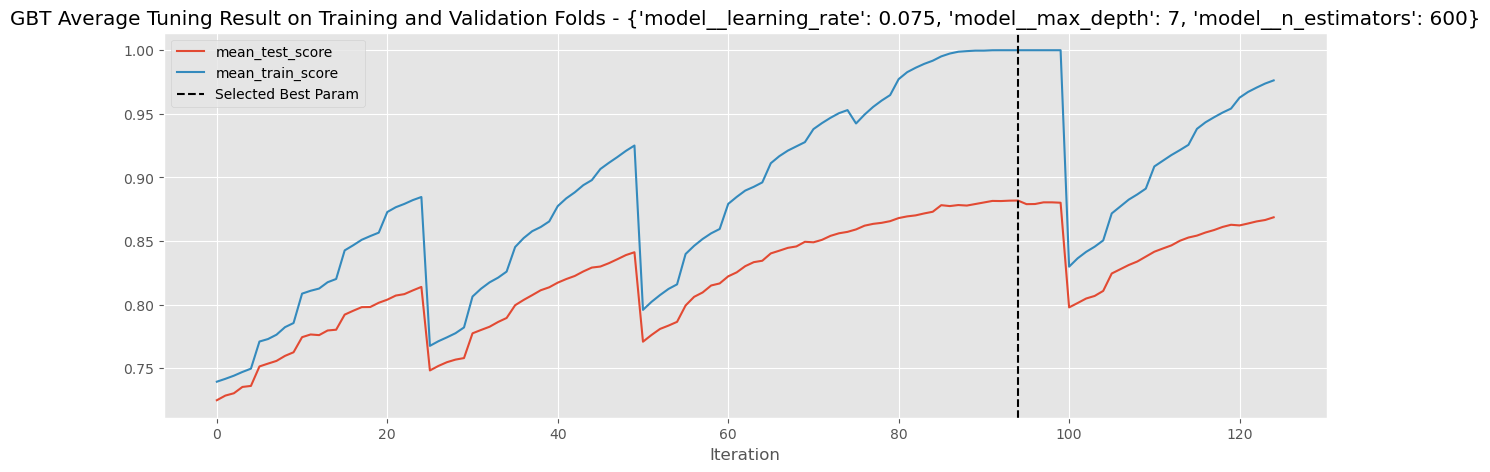

In [165]:
for model in main_meta.keys():
    print(model)
    temp_meta_dict = main_meta[model]
    estimator = temp_meta_dict["estimator"]
    est_name = temp_meta_dict["estimator_name"]
    param_grid = temp_meta_dict["param_grid"]
        
    end2end_model_pipeline(
        energy_data, estimator, est_name,  param_grid, scaling_status=True
        )

Findings about Energy Data:
- All of them work well on the energy data
- Cross validation, validation period mean scores (mean_test_score) is also consistent with test performance.
- Although i dropped the time information from dataset to transform dataset into binary classification problem, and avoid time-series complexity, data leakage may occur due to cross validation type. KFold is used as CV scheme, so time information from future included to cross validation step, but it is just experiment, not as much as important to use the dataset as it.

#### Superconductivity Data Analysis based on different predictive models

In [179]:
# data shape reduction to avoid boosting model run time complexity

mid_data = superconductivity_data[superconductivity_data.target == "Mid Critical Temp"][:400]
low_data = superconductivity_data[superconductivity_data.target == "Low Critical Temp"][:400]
high_data = superconductivity_data[superconductivity_data.target == "High Critical Temp"][:400]

superconductivity_data = pd.concat([low_data, mid_data, high_data], ignore_index=True)
print(superconductivity_data.shape)
superconductivity_data.head()

(1200, 81)


,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,target
0,92.209100,50.945200,67.869108,32.670052,1.172280,1.367867,135.96460,6.879600,55.307695,49.762266,...,2.080000,2.213364,2.065938,1.368922,1.132727,1,0.960000,0.433013,0.271293,Low Critical Temp
1,94.036450,94.036450,65.686358,65.686358,1.100637,1.100637,192.98100,48.245250,71.191171,71.191171,...,2.750000,2.514867,2.514867,1.288252,1.288252,3,0.750000,1.299038,1.299038,Low Critical Temp
2,72.952854,56.774156,59.186241,35.753140,1.445795,1.011249,122.90607,36.291493,40.250192,52.530351,...,2.264286,2.168944,2.226222,1.594167,1.073884,1,1.128571,0.400000,0.440952,Low Critical Temp
3,72.324650,51.067950,58.637102,34.831273,1.444612,1.377152,121.32760,19.838500,40.053512,44.157774,...,2.100000,2.352158,2.082759,1.589027,1.299577,1,1.007692,0.489898,0.300000,Low Critical Temp
4,76.517718,57.497843,59.310096,36.006853,1.197273,0.908852,122.90607,37.772611,44.289459,53.240475,...,2.277341,2.213364,2.238037,1.368922,1.011307,1,1.125089,0.433013,0.447686,Low Critical Temp


In [171]:
knn_model_meta = {
    "estimator": KNeighborsClassifier(),
    "estimator_name": "KNN",
    "param_grid": {
        "model__n_neighbors": np.arange(1, 6),
        "model__p": np.arange(1, 3)
    }
}

dt_model_meta = {
    "estimator": DecisionTreeClassifier(random_state=6969),
    "estimator_name": "DT",
    "param_grid": {
        "model__min_samples_leaf": [5, 10, 15, 20, 25],
        "model__min_samples_split": [10, 20, 30, 40, 50]
    }
}

rf_model_meta = {
    "estimator": RandomForestClassifier(random_state=6969, n_estimators=500, min_samples_leaf=5, ccp_alpha=0),
    "estimator_name": "RF",
    "param_grid": {
        "model__max_features": ["sqrt", "log2", 8, 9, 10, 11, 12]
    }
}

gbt_model_meta = {
    "estimator": GradientBoostingClassifier(random_state=6969),
    "estimator_name": "GBT",
    "param_grid": {
        "model__learning_rate": [0.001, 0.0025, 0.005, 0.075],
        "model__max_depth": [4, 5, 6, 7],
        "model__n_estimators": [350, 400, 450, 500]
    }
}

main_meta = {
    "knn_meta": knn_model_meta,
    "dt_meta": dt_model_meta,
    "rf_meta": rf_model_meta,
    "gbt_meta": gbt_model_meta,
}

knn_meta


Test Results
                     precision    recall  f1-score   support

 Low Critical Temp       0.86      0.84      0.85       200
 Mid Critical Temp       0.76      0.80      0.78       200
High Critical Temp       0.90      0.88      0.89       200

          accuracy                           0.84       600
         macro avg       0.84      0.84      0.84       600
      weighted avg       0.84      0.84      0.84       600

dt_meta
Test Results
                     precision    recall  f1-score   support

 Low Critical Temp       0.72      0.82      0.77       200
 Mid Critical Temp       0.70      0.72      0.71       200
High Critical Temp       0.93      0.77      0.84       200

          accuracy                           0.77       600
         macro avg       0.78      0.77      0.77       600
      weighted avg       0.78      0.77      0.77       600

rf_meta
Test Results
                     precision    recall  f1-score   support

 Low Critical Temp       0.85      

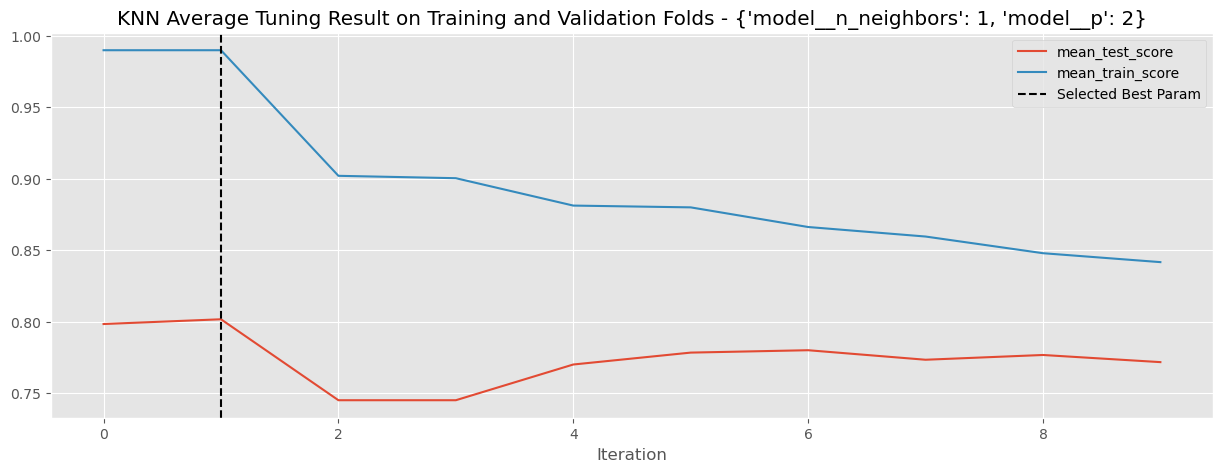

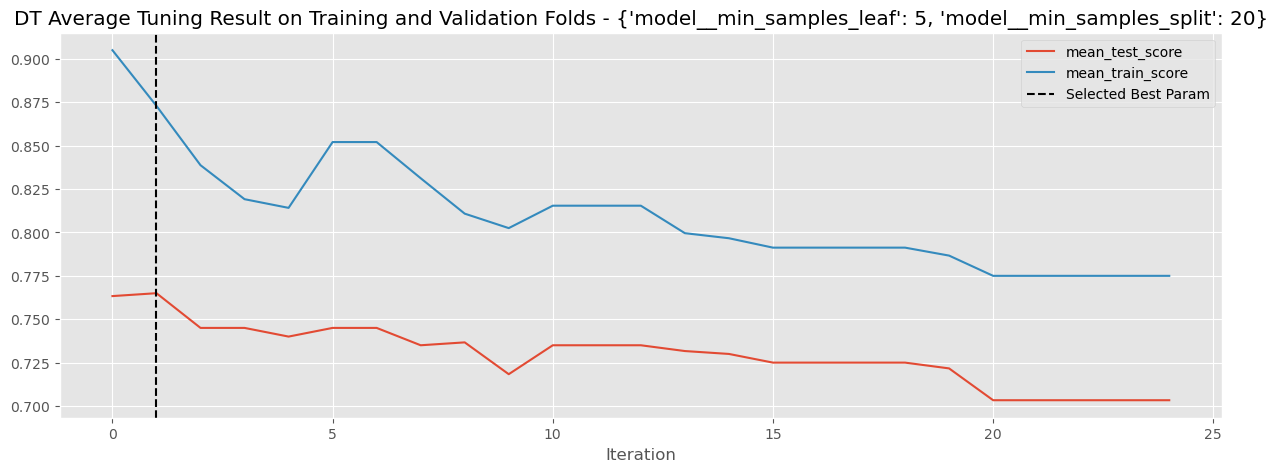

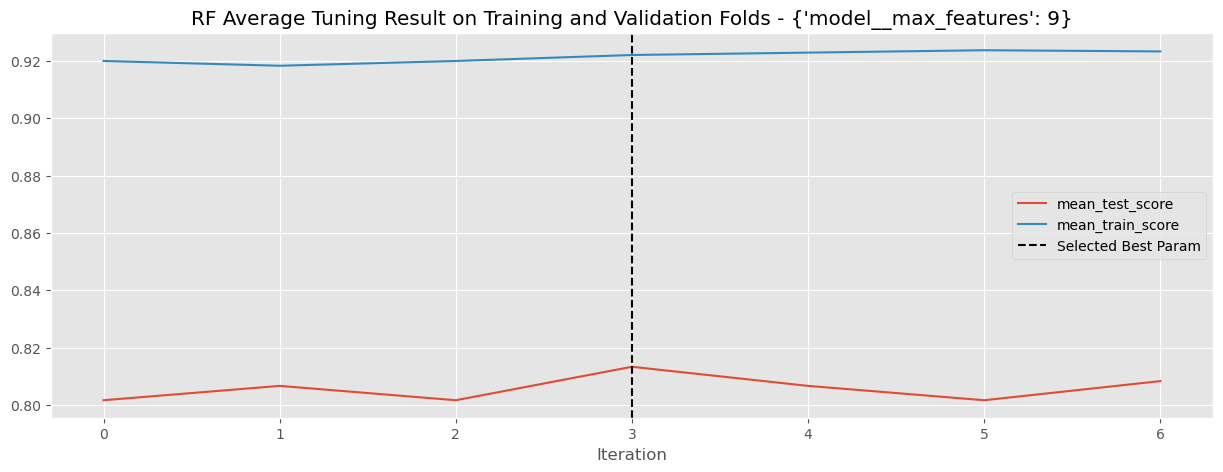

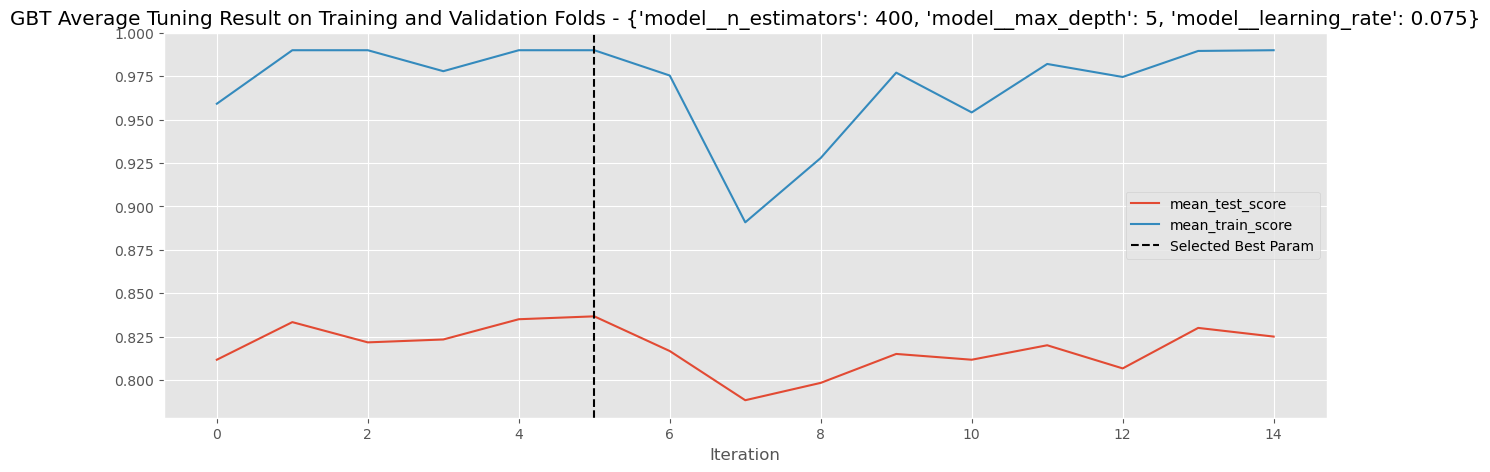

In [180]:
for model in main_meta.keys():
    print(model)
    temp_meta_dict = main_meta[model]
    estimator = temp_meta_dict["estimator"]
    est_name = temp_meta_dict["estimator_name"]
    param_grid = temp_meta_dict["param_grid"]
    
    if model == "gbt_meta":
        tuning = "RandomSearch"
    else:
        tuning = "GridSearch"
    end2end_model_pipeline(
        superconductivity_data, estimator, est_name,  param_grid, tuning_type = tuning, scaling_status=True
        )

Findings about Superconductivity Data:
- GBT, KNN, RF seems to the best than others on test period.
- Cross validation, validation period mean scores (mean_test_score) is also consistent with test performance.
- Decision Tree classifier have slightly worser than GBT, KNN and RF classifiers.
- Performance may be better by using different model parameters.

#### Blog Data Analysis based on different predictive models

In [190]:
# data shape reduction to avoid boosting model run time complexity

with_comment = blog_data[blog_data.target == "Include comment"][:500]
without_comment = blog_data[blog_data.target == "Not include any comment"][:500]

blog_data = pd.concat([with_comment, without_comment], ignore_index=True)
print(blog_data.shape)
blog_data.head()

(1000, 281)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f271,f272,f273,f274,f275,f276,f277,f278,f279,target
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Include comment
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Include comment
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Include comment
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Include comment
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Include comment


In [191]:
knn_model_meta = {
    "estimator": KNeighborsClassifier(),
    "estimator_name": "KNN",
    "param_grid": {
        "model__n_neighbors": np.arange(1, 6),
        "model__p": np.arange(1, 3)
    }
}

dt_model_meta = {
    "estimator": DecisionTreeClassifier(random_state=6969),
    "estimator_name": "DT",
    "param_grid": {
        "model__min_samples_leaf": [5, 10, 15, 20, 25],
        "model__min_samples_split": [10, 20, 30, 40, 50]
    }
}

rf_model_meta = {
    "estimator": RandomForestClassifier(random_state=6969, n_estimators=500, min_samples_leaf=5, ccp_alpha=0),
    "estimator_name": "RF",
    "param_grid": {
        "model__max_features": ["sqrt", "log2", 8, 9, 10, 11, 12]
    }
}

gbt_model_meta = {
    "estimator": GradientBoostingClassifier(random_state=6969),
    "estimator_name": "GBT",
    "param_grid": {
        "model__learning_rate": [0.001, 0.0025, 0.005, 0.075],
        "model__max_depth": [4, 5, 6, 7],
        "model__n_estimators": [350, 400, 450, 500]
    }
}

main_meta = {
    "knn_meta": knn_model_meta,
    "dt_meta": dt_model_meta,
    "rf_meta": rf_model_meta,
    "gbt_meta": gbt_model_meta,
}

knn_meta
Test Results
                          precision    recall  f1-score   support

        Include comment       0.91      0.83      0.87       250
Not include any comment       0.84      0.92      0.88       250

               accuracy                           0.87       500
              macro avg       0.87      0.87      0.87       500
           weighted avg       0.87      0.87      0.87       500

dt_meta
Test Results
                          precision    recall  f1-score   support

        Include comment       0.86      0.68      0.76       250
Not include any comment       0.74      0.89      0.81       250

               accuracy                           0.79       500
              macro avg       0.80      0.79      0.78       500
           weighted avg       0.80      0.79      0.78       500

rf_meta
Test Results
                          precision    recall  f1-score   support

        Include comment       0.82      0.86      0.84       250
Not include any 

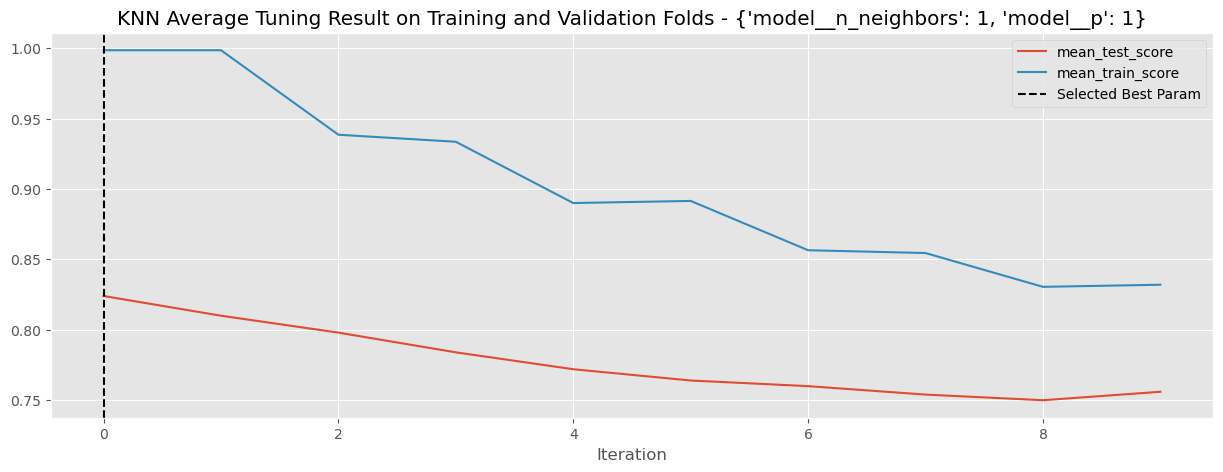

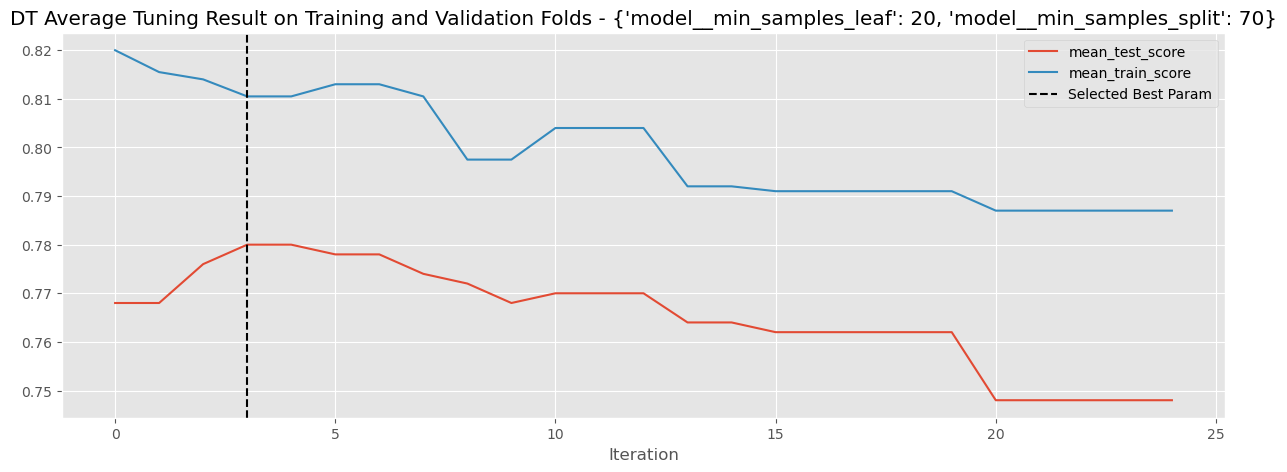

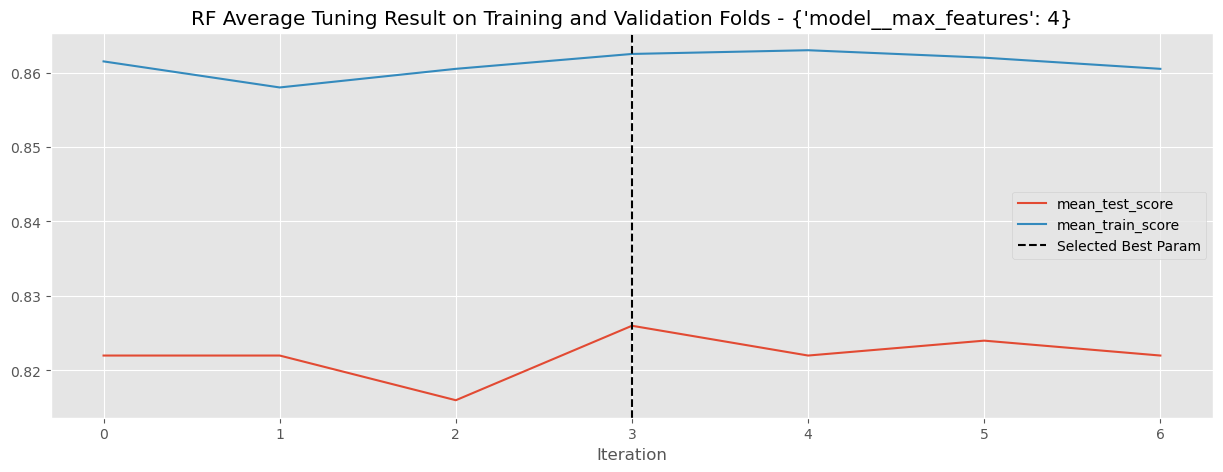

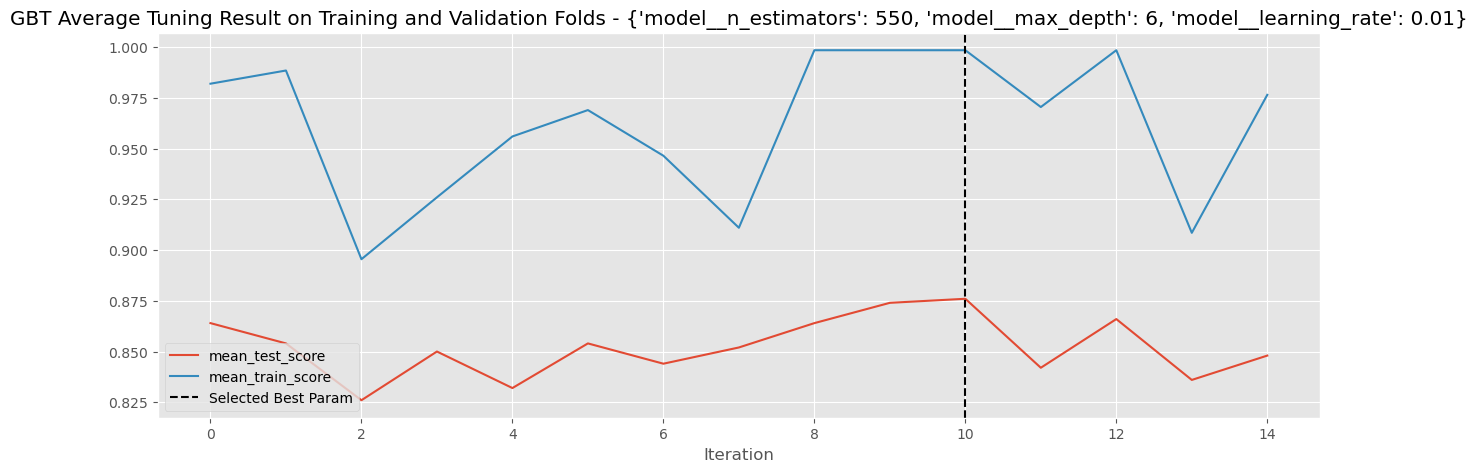

In [210]:
for model in main_meta.keys():
    print(model)
    temp_meta_dict = main_meta[model]
    estimator = temp_meta_dict["estimator"]
    est_name = temp_meta_dict["estimator_name"]
    param_grid = temp_meta_dict["param_grid"]
    
    if model == "gbt_meta":
        tuning = "RandomSearch"
    else:
        tuning = "GridSearch"
    end2end_model_pipeline(
        blog_data, estimator, est_name,  param_grid, tuning_type = tuning, scaling_status=True
        )

Findings about Blog Data:
- GBT, KNN, RF seems to the best than others on test period.
- Cross validation, validation period mean scores (mean_test_score) is also consistent with test performance.
- Decision Tree classifier have slightly worser than GBT, KNN and RF classifiers.
- Performance may be better by using different model parameters.